<a href="https://colab.research.google.com/github/EdwinAR99/TalentoTECH-Repo/blob/master/Convolution_Fashion_TalentoTECH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMPORT LIBS

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# LOAD DATASET

In [26]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize images to [0, 1]
x_train = x_train / 255
x_test = x_test / 255

# Reshape images to (28, 28, 1) to fit the model
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Encode labels in one-hot format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# MODEL

In [28]:
# Define the neural network model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [29]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
# Train the model
history = model.fit(x_train, y_train, epochs=10, verbose=1, batch_size=64)

Epoch 1/10
938/938 [==============================] - 6s 4ms/step - loss: 0.5283 - accuracy: 0.8073
Epoch 2/10
938/938 [==============================] - 4s 5ms/step - loss: 0.3333 - accuracy: 0.8798
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2898 - accuracy: 0.8948
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2556 - accuracy: 0.9066
Epoch 5/10
938/938 [==============================] - 6s 6ms/step - loss: 0.2363 - accuracy: 0.9137
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2142 - accuracy: 0.9212
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1950 - accuracy: 0.9287
Epoch 8/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1844 - accuracy: 0.9311
Epoch 9/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1671 - accuracy: 0.9377
Epoch 10/10
938/938 [==============================] - 4s 5ms/step - loss: 0.1511 - accuracy: 0.9432

# EVALUATE

<Axes: >

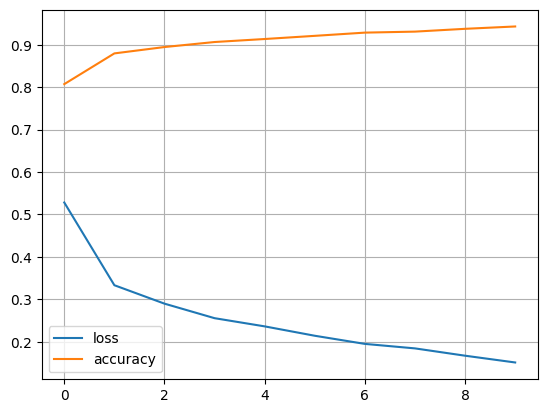

In [31]:
# Grafic the training history
pd.DataFrame(history.history).plot(grid=True)

In [32]:
# Evaluate the model in the training dataset
loss, accuracy = model.evaluate(x_train, y_train)
print('Pérdida en el conjunto de entrenamiento:', loss)
print('Precisión en el conjunto de entrenamiento:', accuracy)

# Evaluate the model with data unseen data
loss, accuracy = model.evaluate(x_test, y_test)
print('Pérdida en el conjunto de entrenamiento:', loss)
print('Precisión en el conjunto de entrenamiento:', accuracy)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1343 - accuracy: 0.9506
Pérdida en el conjunto de entrenamiento: 0.13431599736213684
Precisión en el conjunto de entrenamiento: 0.9506333470344543
313/313 [==============================] - 1s 3ms/step - loss: 0.2676 - accuracy: 0.9118
Pérdida en el conjunto de entrenamiento: 0.26764872670173645
Precisión en el conjunto de entrenamiento: 0.9118000268936157


# ADITIONAL INFORMATION

In [33]:
# Predict
index = 1
print(f'Label: {y_test[index]}')
classification = model.predict(x_test[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')

Label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
1/1 [==============================] - 0s 71ms/step
Classification:
 [[9.2802264e-07]
 [4.2263918e-11]
 [9.9997473e-01]
 [8.0007112e-11]
 [2.4142193e-07]
 [5.4428597e-12]
 [2.4093368e-05]
 [6.5893652e-16]
 [1.6473888e-10]
 [8.0656599e-11]]


In [34]:
print(y_test[:30])

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [36]:
first = 2
second = 5
third = 15

print(y_test[first])
print(y_test[second])
print(y_test[third])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


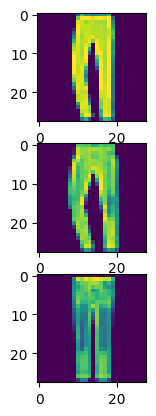

In [37]:
f, axarr = plt.subplots(3, 1)
axarr[0].imshow(x_test[first])
axarr[1].imshow(x_test[second])
axarr[2].imshow(x_test[third])

In [40]:
layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = Model(inputs = model.input, outputs = layer_outputs)

1/1 [==============================] - 0s 26ms/step


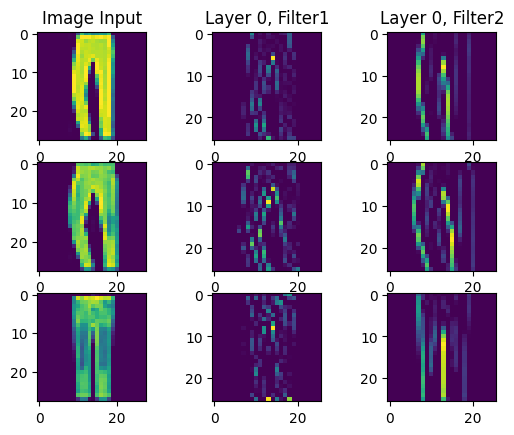

In [41]:
f, axarr = plt.subplots(3, 3)

axarr[0, 0].set_title('Image Input')
axarr[0, 0].imshow(x_test[first])
f1 = activation_model.predict(x_test[first].reshape(1, 28, 28, 1))[layer]
axarr[0, 1].set_title("Layer " + str(layer) + ", Filter1")
axarr[0, 1].imshow(f1[0, :, :, filter1])
axarr[0, 2].set_title("Layer " + str(layer) + ", Filter2")
axarr[0, 2].imshow(f1[0, :, :, filter2])

axarr[1, 0].imshow(x_test[second])
f2 = activation_model.predict(x_test[second].reshape(1, 28, 28, 1))[layer]
axarr[1, 1].imshow(f2[0, :, :, filter1])
axarr[1, 2].imshow(f2[0, :, :, filter2])

axarr[2, 0].imshow(x_test[third])
f3 = activation_model.predict(x_test[third].reshape(1, 28, 28, 1))[layer]
axarr[2, 1].imshow(f3[0, :, :, filter1])
axarr[2, 2].imshow(f3[0, :, :, filter2])